In [1]:
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

import tensorflow as tf
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet

## Train and Test Split

In [2]:
# Step 1: Preprocess and load the WSI data
train_data_directory = r'D:\Practicum\data\input'  # Directory containing training patches
test_data_directory = r'D:\Practicum\data\Validation'    # Directory containing test patches


img_height, img_width = 224, 224  # VGG16 and ResNet50 input size
img_height_inception, img_width_inception = 299, 299  # InceptionV3 and MobileNet input size
batch_size = 32
num_classes = 3  # Number of classes: cancerous, precancerous, and non-cancerous

epochs = 10

# Data augmentation and preprocessing for VGG16 and ResNet50
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Data augmentation and preprocessing for InceptionV3 and MobileNet
train_datagen_inception = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen_inception = ImageDataGenerator(rescale=1.0 / 255)

train_generator_inception = train_datagen_inception.flow_from_directory(
    train_data_directory,
    target_size=(img_height_inception, img_width_inception),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator_inception = test_datagen_inception.flow_from_directory(
    test_data_directory,
    target_size=(img_height_inception, img_width_inception),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_names = list(test_generator.class_indices.keys())

# Step 1.5: Check count of images in each category in train data and test data

test_data_counts = {}
for class_name in class_names:
    class_directory = os.path.join(test_data_directory, class_name)
    num_images = len(os.listdir(class_directory))
    test_data_counts[class_name] = num_images

print("\nCount of Images in Each Category in Test Data:")
for class_name, count in test_data_counts.items():
  print(f"{class_name}: {count}")

train_class_counts = train_generator.class_indices
print("Training size for each class:")
for class_name, class_index in train_class_counts.items():
    class_count = sum(train_generator.classes == class_index)
    print(f"{class_name}: {class_count} samples")

Found 3566 images belonging to 3 classes.
Found 489 images belonging to 3 classes.
Found 3566 images belonging to 3 classes.
Found 489 images belonging to 3 classes.

Count of Images in Each Category in Test Data:
cancerous: 166
non-cancerous: 163
pre-cancerous: 162
Training size for each class:
cancerous: 1273 samples
noncancerous: 1192 samples
precancerous: 1101 samples


## VGG16

Epoch 1/10
  5/111 [>.............................] - ETA: 11:12 - loss: 1.0900 - accuracy: 0.4313

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (139583899 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 20/111 [====>.........................] - ETA: 11:21 - loss: 0.9991 - accuracy: 0.4812

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (155055316 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 68/111 [=================>............] - ETA: 5:29 - loss: 0.8823 - accuracy: 0.5726

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (146571400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 92/111 [=======================>......] - ETA: 2:26 - loss: 0.8545 - accuracy: 0.5957

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (173327462 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


111/111 [==============================] - 875s 8s/step - loss: 0.8371 - accuracy: 0.6078
Epoch 2/10
111/111 [==============================] - 870s 8s/step - loss: 0.6669 - accuracy: 0.7128
Epoch 3/10
111/111 [==============================] - 875s 8s/step - loss: 0.5859 - accuracy: 0.7578
Epoch 4/10
111/111 [==============================] - 880s 8s/step - loss: 0.5422 - accuracy: 0.7773
Epoch 5/10
111/111 [==============================] - 891s 8s/step - loss: 0.5061 - accuracy: 0.7917
Epoch 6/10
111/111 [==============================] - 884s 8s/step - loss: 0.4933 - accuracy: 0.7954
Epoch 7/10
111/111 [==============================] - 862s 8s/step - loss: 0.4382 - accuracy: 0.8254
Epoch 8/10
111/111 [==============================] - 1582s 14s/step - loss: 0.4353 - accuracy: 0.8288
Epoch 9/10
111/111 [==============================] - 890s 8s/step - loss: 0.4261 - accuracy: 0.8251
Epoch 10/10
16/16 [==============================] - 98s 6s/step - loss: 0.9085 - accuracy: 0.6258
V

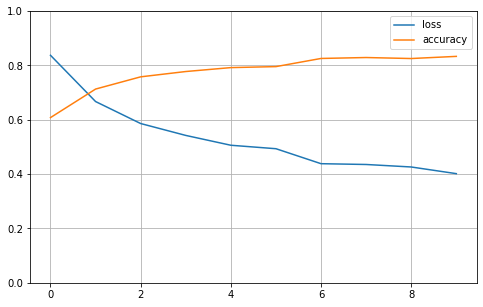

In [3]:
# Step 2: Define the model architecture for each model and compile it

# Model 1: VGG16
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model_vgg16.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions_vgg16 = Dense(num_classes, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions_vgg16)
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the models

# Train VGG16 model
vgg16_history = model_vgg16.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)


# Step 4: Evaluate the models on the test set and compute metrics

# Model 1: VGG16
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(test_generator, steps=None)
print(f"VGG16 Test accuracy: {accuracy_vgg16:.2f}")


# Step 5: Compute category-wise accuracy and F1 score
y_true = test_generator.classes


y_pred_vgg16 = model_vgg16.predict(test_generator, steps=None).argmax(axis=1)


# Compute category-wise accuracy for VGG16
accuracy_per_class_vgg16 = {}
for i, class_name in enumerate(class_names):
    indices = np.where(y_true == i)[0]
    accuracy_per_class_vgg16[class_name] = np.mean(y_true[indices] == y_pred_vgg16[indices])

print("Category-wise Accuracy for VGG16:")
for class_name, acc in accuracy_per_class_vgg16.items():
    print(f"{class_name}: {acc:.2f}")


# Compute category-wise F1 score for VGG16
f1_per_class_vgg16 = {}
for i, class_name in enumerate(class_names):
    indices = np.where(y_true == i)[0]
    f1_per_class_vgg16[class_name] = f1_score(y_true[indices], y_pred_vgg16[indices], average='weighted')

print("\nCategory-wise F1 Score for VGG16:")
for class_name, f1 in f1_per_class_vgg16.items():
    print(f"{class_name}: {f1:.2f}")

# Step 6: Compute overall accuracy and F1 score

# Compute overall accuracy for VGG16
overall_accuracy_vgg16 = np.mean(y_true == y_pred_vgg16)
print("\nOverall Accuracy for VGG16:", overall_accuracy_vgg16)

# Compute Learning Curve for VGG16
pd.DataFrame(vgg16_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



In [8]:
# Compute overall F1 score for VGG16
overall_f1_vgg16 = f1_score(y_true, y_pred_vgg16, average='weighted')
print("Overall F1 Score for VGG16:", overall_f1_vgg16)

Overall F1 Score for VGG16: 0.6212845564421626


## Resnet50

Epoch 1/10
 17/111 [===>..........................] - ETA: 11:56 - loss: 0.8634 - accuracy: 0.6305

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (139583899 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 78/111 [====================>.........] - ETA: 4:17 - loss: 0.6851 - accuracy: 0.7211

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (155055316 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 94/111 [========================>.....] - ETA: 2:11 - loss: 0.6536 - accuracy: 0.7334

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (146571400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


104/111 [===========================>..] - ETA: 54s - loss: 0.6446 - accuracy: 0.7369 

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (173327462 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


111/111 [==============================] - 878s 8s/step - loss: 0.6402 - accuracy: 0.7405
Epoch 2/10
111/111 [==============================] - 863s 8s/step - loss: 0.4115 - accuracy: 0.8353
Epoch 3/10
111/111 [==============================] - 3203s 29s/step - loss: 0.3102 - accuracy: 0.8724
Epoch 4/10
111/111 [==============================] - 870s 8s/step - loss: 0.2767 - accuracy: 0.8928
Epoch 5/10
111/111 [==============================] - 866s 8s/step - loss: 0.2132 - accuracy: 0.9188
Epoch 6/10
111/111 [==============================] - 844s 8s/step - loss: 0.1904 - accuracy: 0.9259
Epoch 7/10
111/111 [==============================] - 851s 8s/step - loss: 0.1382 - accuracy: 0.9488
Epoch 8/10
111/111 [==============================] - 864s 8s/step - loss: 0.1235 - accuracy: 0.9553
Epoch 9/10
111/111 [==============================] - 1364s 12s/step - loss: 0.1500 - accuracy: 0.9448
Epoch 10/10
16/16 [==============================] - 94s 6s/step - loss: 2.0091 - accuracy: 0.5828

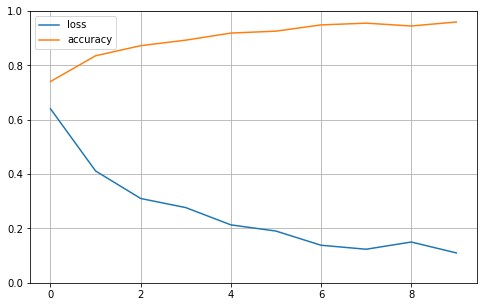

In [4]:
# Model 2: ResNet50
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model_resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions_resnet50 = Dense(num_classes, activation='softmax')(x)
model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions_resnet50)
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train ResNet50 model
resnet_history = model_resnet50.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)

# Model 2: ResNet50
loss_resnet50, accuracy_resnet50 = model_resnet50.evaluate(test_generator, steps=None)
print(f"ResNet50 Test accuracy: {accuracy_resnet50:.2f}")

y_pred_resnet50 = model_resnet50.predict(test_generator, steps=None).argmax(axis=1)

# Compute category-wise accuracy for ResNet50
accuracy_per_class_resnet50 = {}
for i, class_name in enumerate(class_names):
    indices = np.where(y_true == i)[0]
    accuracy_per_class_resnet50[class_name] = np.mean(y_true[indices] == y_pred_resnet50[indices])

print("\nCategory-wise Accuracy for ResNet50:")
for class_name, acc in accuracy_per_class_resnet50.items():
    print(f"{class_name}: {acc:.2f}")

# Compute overall accuracy for ResNet50
overall_accuracy_resnet50 = np.mean(y_true == y_pred_resnet50)
print("Overall Accuracy for ResNet50:", overall_accuracy_resnet50)

# Compute overall F1 score for ResNet50
overall_f1_resnet50 = f1_score(y_true, y_pred_resnet50, average='weighted')
print("Overall F1 Score for ResNet50:", overall_f1_resnet50)

# Compute Learning Curve for Resnet50
pd.DataFrame(resnet_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
# Compute category-wise F1 score for InceptionV3
f1_per_class_resnet50 = {}
for i, class_name in enumerate(class_names):
    indices = np.where(y_true == i)[0]
    f1_per_class_resnet50[class_name] = f1_score(y_true[indices], y_pred_resnet50[indices], average='weighted')

print("\nCategory-wise F1 Score for Resnet50:")
for class_name, f1 in f1_per_class_resnet50.items():
    print(f"{class_name}: {f1:.2f}")


Category-wise F1 Score for Resnet50:
cancerous: 0.89
non-cancerous: 0.70
pre-cancerous: 0.58


## InceptionV3


In [5]:
# Model 3: InceptionV3
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height_inception, img_width_inception, 3))
x = base_model_inceptionv3.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions_inceptionv3 = Dense(num_classes, activation='softmax')(x)
model_inceptionv3 = Model(inputs=base_model_inceptionv3.input, outputs=predictions_inceptionv3)
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train InceptionV3 model
inceptionv3_history = model_inceptionv3.fit(train_generator_inception, steps_per_epoch=train_generator_inception.samples // batch_size, epochs=epochs)

# Model 3: InceptionV3
loss_inceptionv3, accuracy_inceptionv3 = model_inceptionv3.evaluate(test_generator_inception, steps=None)
print(f"InceptionV3 Test accuracy: {accuracy_inceptionv3:.2f}")



Epoch 1/10
  7/111 [>.............................] - ETA: 12:33 - loss: 0.9817 - accuracy: 0.4821

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (146571400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 19/111 [====>.........................] - ETA: 11:58 - loss: 0.8524 - accuracy: 0.6034

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (139583899 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 57/111 [==============>...............] - ETA: 7:03 - loss: 0.6966 - accuracy: 0.7010

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (173327462 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 76/111 [===================>..........] - ETA: 4:39 - loss: 0.6635 - accuracy: 0.7187

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (155055316 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


111/111 [==============================] - 896s 8s/step - loss: 0.6120 - accuracy: 0.7422
Epoch 2/10
111/111 [==============================] - 898s 8s/step - loss: 0.3855 - accuracy: 0.8424
Epoch 3/10
111/111 [==============================] - 894s 8s/step - loss: 0.2797 - accuracy: 0.8945
Epoch 4/10
111/111 [==============================] - 926s 8s/step - loss: 0.2382 - accuracy: 0.9035
Epoch 5/10
111/111 [==============================] - 924s 8s/step - loss: 0.1656 - accuracy: 0.9420
Epoch 6/10
111/111 [==============================] - 908s 8s/step - loss: 0.1478 - accuracy: 0.9448
Epoch 7/10
111/111 [==============================] - 929s 8s/step - loss: 0.1300 - accuracy: 0.9533
Epoch 8/10
111/111 [==============================] - 949s 9s/step - loss: 0.1007 - accuracy: 0.9612
Epoch 9/10
111/111 [==============================] - 964s 9s/step - loss: 0.0974 - accuracy: 0.9621
Epoch 10/10
16/16 [==============================] - 102s 6s/step - loss: 1.6277 - accuracy: 0.6830
In

NameError: name 'y_pred_inceptionv3' is not defined

16/16 [==============================] - 39s 2s/step

Category-wise Accuracy for InceptionV3:
cancerous: 0.69
non-cancerous: 0.46
pre-cancerous: 0.73

Category-wise F1 Score for InceptionV3:
cancerous: 0.81
non-cancerous: 0.63
pre-cancerous: 0.84
Overall Accuracy for InceptionV3: 0.6257668711656442
Overall F1 Score for InceptionV3: 0.6209885397634034


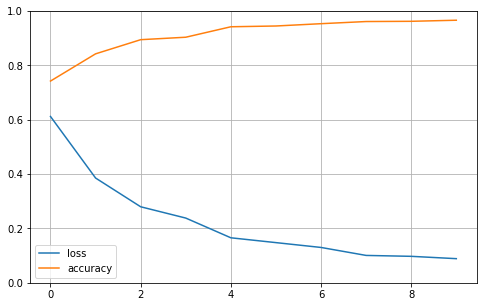

In [6]:
y_pred_inceptionv3 = model_inceptionv3.predict(test_generator, steps=None).argmax(axis=1)

# Compute category-wise accuracy for InceptionV3
accuracy_per_class_inceptionv3 = {}
for i, class_name in enumerate(class_names):
    indices = np.where(y_true == i)[0]
    accuracy_per_class_inceptionv3[class_name] = np.mean(y_true[indices] == y_pred_inceptionv3[indices])

print("\nCategory-wise Accuracy for InceptionV3:")
for class_name, acc in accuracy_per_class_inceptionv3.items():
    print(f"{class_name}: {acc:.2f}")

# Compute category-wise F1 score for InceptionV3
f1_per_class_inceptionv3 = {}
for i, class_name in enumerate(class_names):
    indices = np.where(y_true == i)[0]
    f1_per_class_inceptionv3[class_name] = f1_score(y_true[indices], y_pred_inceptionv3[indices], average='weighted')

print("\nCategory-wise F1 Score for InceptionV3:")
for class_name, f1 in f1_per_class_inceptionv3.items():
    print(f"{class_name}: {f1:.2f}")

# Compute overall accuracy for InceptionV3
overall_accuracy_inceptionv3 = np.mean(y_true == y_pred_inceptionv3)
print("Overall Accuracy for InceptionV3:", overall_accuracy_inceptionv3)

# Compute overall F1 score for InceptionV3
overall_f1_inceptionv3 = f1_score(y_true, y_pred_inceptionv3, average='weighted')
print("Overall F1 Score for InceptionV3:", overall_f1_inceptionv3)

# Compute Learning Curve for InceptionV3
pd.DataFrame(inceptionv3_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Mobinet

Epoch 1/10
 40/111 [=========>....................] - ETA: 9:49 - loss: 0.7764 - accuracy: 0.6531 

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (173327462 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 61/111 [===============>..............] - ETA: 6:55 - loss: 0.6999 - accuracy: 0.6939

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (146571400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 69/111 [=================>............] - ETA: 5:48 - loss: 0.6943 - accuracy: 0.7041

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (155055316 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 89/111 [=======================>......] - ETA: 5:07 - loss: 0.6652 - accuracy: 0.7201

C:\Users\VineetSajwan\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (139583899 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


111/111 [==============================] - 1431s 13s/step - loss: 0.6510 - accuracy: 0.7230
Epoch 2/10
111/111 [==============================] - 900s 8s/step - loss: 0.4226 - accuracy: 0.8316
Epoch 3/10
111/111 [==============================] - 891s 8s/step - loss: 0.3175 - accuracy: 0.8718
Epoch 4/10
111/111 [==============================] - 890s 8s/step - loss: 0.2657 - accuracy: 0.8959
Epoch 5/10
111/111 [==============================] - 899s 8s/step - loss: 0.2352 - accuracy: 0.9086
Epoch 6/10
111/111 [==============================] - 896s 8s/step - loss: 0.1788 - accuracy: 0.9338
Epoch 7/10
111/111 [==============================] - 897s 8s/step - loss: 0.1491 - accuracy: 0.9440
Epoch 8/10
111/111 [==============================] - 898s 8s/step - loss: 0.1283 - accuracy: 0.9539
Epoch 9/10
111/111 [==============================] - 885s 8s/step - loss: 0.0962 - accuracy: 0.9641
Epoch 10/10
16/16 [==============================] - 93s 6s/step - loss: 1.6725 - accuracy: 0.6258
M

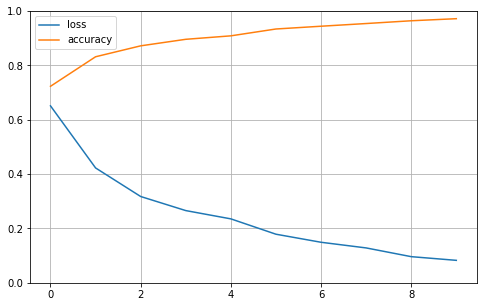

In [7]:
# Model 4: MobileNet
base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height_inception, img_width_inception, 3))
x = base_model_mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions_mobilenet = Dense(num_classes, activation='softmax')(x)
model_mobilenet = Model(inputs=base_model_mobilenet.input, outputs=predictions_mobilenet)
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train MobileNet model
mobinet_history = model_mobilenet.fit(train_generator_inception, steps_per_epoch=train_generator_inception.samples // batch_size, epochs=epochs)

# Model 4: MobileNet
loss_mobilenet, accuracy_mobilenet = model_mobilenet.evaluate(test_generator_inception, steps=None)
print(f"MobileNet Test accuracy: {accuracy_mobilenet:.2f}")

y_pred_mobilenet = model_mobilenet.predict(test_generator_inception, steps=None).argmax(axis=1)


# Compute category-wise accuracy for MobileNet
accuracy_per_class_mobilenet = {}
for i, class_name in enumerate(class_names):
    indices = np.where(y_true == i)[0]
    accuracy_per_class_mobilenet[class_name] = np.mean(y_true[indices] == y_pred_mobilenet[indices])

print("\nCategory-wise Accuracy for MobileNet:")
for class_name, acc in accuracy_per_class_mobilenet.items():
    print(f"{class_name}: {acc:.2f}")

    

# Compute category-wise F1 score for MobileNet
f1_per_class_mobilenet = {}
for i, class_name in enumerate(class_names):
    indices = np.where(y_true == i)[0]
    f1_per_class_mobilenet[class_name] = f1_score(y_true[indices], y_pred_mobilenet[indices], average='weighted')

print("\nCategory-wise F1 Score for MobileNet:")
for class_name, f1 in f1_per_class_mobilenet.items():
    print(f"{class_name}: {f1:.2f}")

    

# Compute overall accuracy for MobileNet
overall_accuracy_mobilenet = np.mean(y_true == y_pred_mobilenet)
print("Overall Accuracy for MobileNet:", overall_accuracy_mobilenet)


# Compute overall F1 score for MobileNet
overall_f1_mobilenet = f1_score(y_true, y_pred_mobilenet, average='weighted')
print("Overall F1 Score for MobileNet:", overall_f1_mobilenet)

# Compute Learning Curve for Mobinet
pd.DataFrame(mobinet_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## F1 Score Across Models 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Sample data of f1_scores_dict
f1_scores_dict = {
 'VGG16': f1_per_class_vgg16,
 'Resnet50': f1_per_class_resnet50,
 'InceptionV3': f1_per_class_inceptionv3,
 'Mobinet': f1_per_class_mobilenet
}

# Convert f1_scores_dict into a DataFrame
df_f1_scores = pd.DataFrame(f1_scores_dict)

# Set the class names as the index for better visualization
df_f1_scores.index.name = 'Classes'

# Transpose the DataFrame for easier plotting
df_f1_scores = df_f1_scores.T

<Figure size 864x432 with 0 Axes>

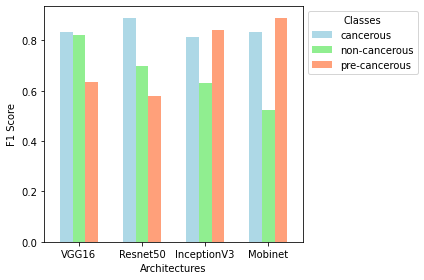

In [14]:
colors = ['#add8e6', '#90ee90', '#ffa07a', '#dda0dd']

# Create a bar plot with the professional color scheme
plt.figure(figsize=(12, 6))
ax = df_f1_scores.plot(kind='bar', width=0.6, color=colors)
ax.set_xlabel('Architectures')
ax.set_ylabel('F1 Score')
#ax.set_title('Class-wise F1 Scores of Different Models')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Classes', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

In [15]:
df_f1_scores


Classes,cancerous,non-cancerous,pre-cancerous
VGG16,0.835088,0.820513,0.632911
Resnet50,0.889632,0.696356,0.578947
InceptionV3,0.814286,0.629787,0.842857
Mobinet,0.835088,0.522936,0.890411


<Figure size 864x432 with 0 Axes>

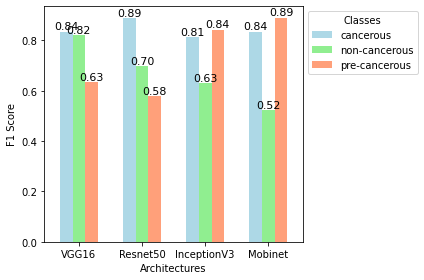

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data of f1_scores_dict
f1_scores_dict = {
 'VGG16': f1_per_class_vgg16,
 'Resnet50': f1_per_class_resnet50,
 'InceptionV3': f1_per_class_inceptionv3,
 'Mobinet': f1_per_class_mobilenet
}

# Convert f1_scores_dict into a DataFrame
df_f1_scores = pd.DataFrame(f1_scores_dict)

# Set the class names as the index for better visualization
df_f1_scores.index.name = 'Classes'

# Transpose the DataFrame for easier plotting
df_f1_scores = df_f1_scores.T

colors = ['#add8e6', '#90ee90', '#ffa07a', '#dda0dd']

# Create a bar plot with the professional color scheme
plt.figure(figsize=(12, 6))
ax = df_f1_scores.plot(kind='bar', width=0.6, color=colors)
ax.set_xlabel('Architectures')
ax.set_ylabel('F1 Score')
#ax.set_title('Class-wise F1 Scores of Different Models')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Classes', bbox_to_anchor=(1.0, 1.0))

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

<Figure size 864x720 with 0 Axes>

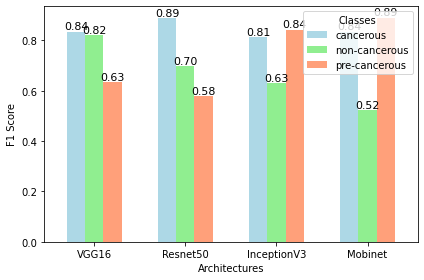

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dummy data for F1 scores for each model and class
models = ['VGG16', 'Resnet50', 'InceptionV3', 'Mobinet']
# Sample data of f1_scores_dict
f1_scores_dict = {
 'VGG16': f1_per_class_vgg16,
 'Resnet50': f1_per_class_resnet50,
 'InceptionV3': f1_per_class_inceptionv3,
 'Mobinet': f1_per_class_mobilenet
}

# Convert f1_scores_dict into a DataFrame
df_f1_scores = pd.DataFrame(f1_scores_dict)

# Set the class names as the index for better visualization
df_f1_scores.index.name = 'Classes'

# Transpose the DataFrame for easier plotting
df_f1_scores = df_f1_scores.T


colors = ['#add8e6', '#90ee90', '#ffa07a', '#dda0dd']

# Create a bar plot with the professional color scheme
plt.figure(figsize=(12, 10))
ax = df_f1_scores.plot(kind='bar', width=0.6, color=colors)
ax.set_xlabel('Architectures')
ax.set_ylabel('F1 Score')
plt.xticks(rotation=0, ha='center')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Place the legend inside the plot at the top right side
plt.legend(title='Classes', loc='upper right', ncol=1)

plt.tight_layout()
plt.show()

<Figure size 864x1440 with 0 Axes>

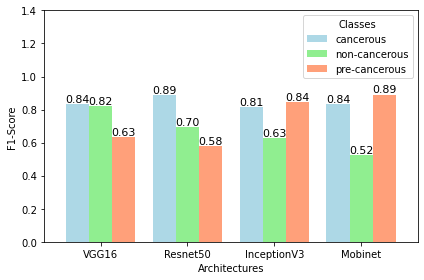

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dummy data for F1 scores for each model and class
models = ['VGG16', 'Resnet50', 'InceptionV3', 'Mobinet']
# Sample data of f1_scores_dict
f1_scores_dict = {
 'VGG16': f1_per_class_vgg16,
 'Resnet50': f1_per_class_resnet50,
 'InceptionV3': f1_per_class_inceptionv3,
 'Mobinet': f1_per_class_mobilenet
}

# Convert f1_scores_dict into a DataFrame
df_f1_scores = pd.DataFrame(f1_scores_dict)

# Set the class names as the index for better visualization
df_f1_scores.index.name = 'Classes'

# Transpose the DataFrame for easier plotting
df_f1_scores = df_f1_scores.T


colors = ['#add8e6', '#90ee90', '#ffa07a', '#dda0dd']


# Create a bar plot with the professional color scheme
plt.figure(figsize=(12, 20))
ax = df_f1_scores.plot(kind='bar', width=0.8, color=colors)
ax.set_xlabel('Architectures')
ax.set_ylabel('F1-Score')
plt.xticks(rotation=0, ha='center')

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Place the legend inside the plot at the upper right corner
ax.legend(title='Classes', loc='upper right')

# Set the range for the y-axis
plt.ylim(0, 1.4)

plt.tight_layout()
plt.show()